In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# preparing data
# adding noise means that the network is less able to memorize training samples

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [3]:
X_numpy.shape, y_numpy.shape

((100, 1), (100,))

In [26]:
# converting to tensor

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [27]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100]))

In [28]:
y.shape[0]

100

In [29]:
# reshaping y

y = y.view(y.shape[0], 1)
y.shape

torch.Size([100, 1])

In [30]:
n_samples, n_features = X.shape
n_samples, n_features

(100, 1)

In [31]:
# linear model f = wx + b

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [32]:
# loss and optimizer

learning_rate = 0.01

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [33]:
# training loop

num_epochs = 200
for epoch in range(num_epochs):

    # forward pass and loss
    y_hat = model(X)
    loss = loss_func(y_hat, y)                  # loss_func is an object used as a function
    
    # backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()                       # dy_hat/dw = 0 after every epoch

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4009.9326
epoch: 20, loss = 2825.8999
epoch: 30, loss = 2019.1232
epoch: 40, loss = 1469.2788
epoch: 50, loss = 1094.4603
epoch: 60, loss = 838.8992
epoch: 70, loss = 664.6140
epoch: 80, loss = 545.7325
epoch: 90, loss = 464.6261
epoch: 100, loss = 409.2807
epoch: 110, loss = 371.5068
epoch: 120, loss = 345.7210
epoch: 130, loss = 328.1154
epoch: 140, loss = 316.0927
epoch: 150, loss = 307.8810
epoch: 160, loss = 302.2716
epoch: 170, loss = 298.4390
epoch: 180, loss = 295.8200
epoch: 190, loss = 294.0301
epoch: 200, loss = 292.8065


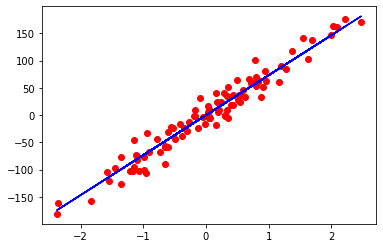

In [34]:
# plot
predicted = model(X).detach().numpy()         # detaching tensor

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [37]:
predicted[:10]

array([[-98.99765  ],
       [ 25.597235 ],
       [ 69.74962  ],
       [  2.404123 ],
       [  3.2894497],
       [  3.3331916],
       [ 52.79124  ],
       [ 58.563217 ],
       [-84.069336 ],
       [ 12.921341 ]], dtype=float32)

In [38]:
y_numpy[:10]

array([-126.24922409,   50.92876904,   63.15463302,    6.05472009,
         -5.72954025,   -2.75191769,   58.70355923,   53.81362958,
        -95.34105851,   24.64812471])

In [40]:
X_numpy[:10]

array([[-1.3474603 ],
       [ 0.3523434 ],
       [ 0.9546986 ],
       [ 0.03592805],
       [ 0.04800625],
       [ 0.04860301],
       [ 0.72334161],
       [ 0.80208661],
       [-1.14379857],
       [ 0.17941071]])